In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [4]:
X = df[['NA_Sales','EU_Sales']].to_numpy()

In [5]:
y =  df['Global_Sales'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.10, random_state=42)

Linear Regression

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [1.14837172 1.35098725]
Intercept:  0.03552408655030248


In [9]:
from sklearn.metrics import r2_score
pred_y = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pred_y , test_y) )

Mean absolute error: 0.11
Residual sum of squares (MSE): 0.10
R2-score: 0.95


In [21]:
print(pred_y)
len(pred_y)

[0.1956164  0.45704253 0.06254383 ... 0.0470078  0.19494319 0.03552409]


1660

In [22]:
print(test_y)
len(test_y)

[0.15 0.4  0.02 ... 0.02 0.14 0.1 ]


1660

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

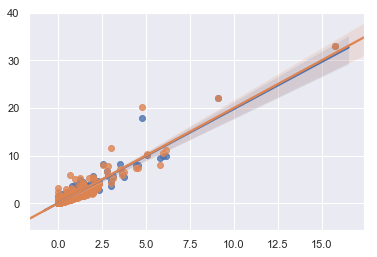

In [47]:
ax = sns.regplot(x=test_x[:,0],y=pred_y)
sns.regplot(x=test_x[:,0],y=test_y,ax=ax)

Support Vector Regression

In [41]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=3, epsilon=0.2,kernel='linear')
clf.fit(train_x, train_y)

SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
pred_y2 = clf.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_y2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pred_y2 , test_y) )

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.12
R2-score: 0.93


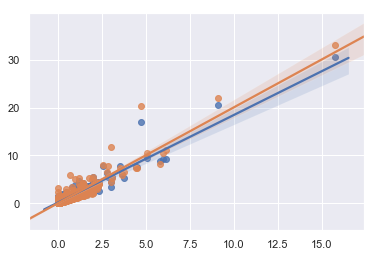

In [45]:
ax = sns.regplot(x=test_x[:,0],y=pred_y2)
sns.regplot(x=test_x[:,0],y=test_y,ax=ax)